In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\aditya\AppData\Local\Temp\ipykernel_76668\2080034654.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
SEED = 1234
NUM_SAMPLES = 50


In [3]:
np.random.seed(SEED)

In [4]:
def generate_data(num_samples):
    '''Generate data for linear regression. 
    theto 0 and theta1 being defined here'''
    X = np.array(range(num_samples))
    random_noise = np.random.uniform(-10,20, size=num_samples)
    y = 3.5*X + random_noise # add some noise
    return X, y

In [5]:
X, y = generate_data(num_samples=NUM_SAMPLES)
data = np.vstack([X, y]).T
print(data[:5])

[[ 0.         -4.25441649]
 [ 1.         12.16326313]
 [ 2.         10.13183217]
 [ 3.         24.06075751]
 [ 4.         27.39927424]]


In [7]:
df = pd.DataFrame(data, columns=["X","y"])

X = df[["X"]].values
y = df[["y"]].values
df.head()

,X,y
0,0.0,-4.254416
1,1.0,12.163263
2,2.0,10.131832
3,3.0,24.060758
4,4.0,27.399274


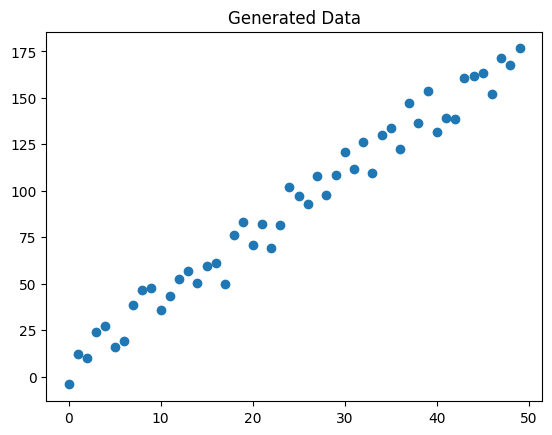

In [9]:
plt.title("Generated Data")
plt.scatter(x=df["X"], y=df["y"])
plt.show()

In [10]:
TRAIN_SIZE = 0.7
VAL_SIZE = 0.15
TEST_SIZE = 0.15


In [11]:
indices = list(range(NUM_SAMPLES))
np.random.shuffle(indices)
X = X[indices]
y = y[indices]


In [12]:
train_start = 0
train_end = int(0.7 * NUM_SAMPLES)
val_start = train_end
val_end = int((TRAIN_SIZE+VAL_SIZE) * NUM_SAMPLES)
test_start = val_end

In [13]:
X_train = X[train_start:train_end]
y_train = y[train_start:train_end]
X_val = X[val_start:val_end]
y_val = y[val_start:val_end]
X_test = X[test_start:]
y_test = y[test_start:]
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_val:{X_val.shape}, y_test: {y_val.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")

X_train: (35, 1), y_train: (35, 1)
X_val:(7, 1), y_test: (7, 1)
X_test: (8, 1), y_test: (8, 1)


In [14]:
def standardize_data(data, mean, std):
    return (data - mean)/std

In [15]:
# Determine means and stds
X_mean = np.mean(X_train)
X_std = np.std(X_train)
y_mean = np.mean(y_train)
y_std = np.std(y_train)


In [16]:
# Standardize
X_train = standardize_data(X_train, X_mean, X_std)
y_train = standardize_data(y_train, y_mean, y_std)
X_val = standardize_data(X_val, X_mean, X_std)
y_val = standardize_data(y_val, y_mean, y_std)
X_test = standardize_data(X_test, X_mean, X_std)
y_test = standardize_data(y_test, y_mean, y_std)

In [17]:
print (f"mean: {np.mean(X_test, axis=0)[0]:.1f}, std: {np.std(X_test, axis=0)[0]:.1f}")
print (f"mean: {np.mean(y_test, axis=0)[0]:.1f}, std: {np.std(y_test, axis=0)[0]:.1f}")


mean: -0.6, std: 0.9
mean: -0.6, std: 0.9


In [30]:
INPUT_DIM = X_train.shape[1]

OUTPUT_DIM = y_train.shape[1]
print(INPUT_DIM, OUTPUT_DIM)

1 1


In [31]:
W = 0.01 * np.random.randn(INPUT_DIM, OUTPUT_DIM)
b = np.zeros((1,1))
print(W,b)


[[0.0016453]] [[0.]]


In [33]:
y_pred = np.dot(X_train, W) + b
print(y_pred)

[[-0.00055348]
 [-0.0027674 ]
 [ 0.00154974]
 [-0.00232462]
 [-0.00154974]
 [ 0.00188183]
 [-0.00210322]
 [-0.00177114]
 [ 0.00033209]
 [-0.00033209]
 [ 0.00166044]
 [-0.00121766]
 [-0.00088557]
 [ 0.00199253]
 [-0.00166044]
 [ 0.        ]
 [ 0.00210322]
 [ 0.00110696]
 [-0.0028781 ]
 [ 0.00022139]
 [ 0.00132835]
 [-0.00199253]
 [ 0.00243531]
 [ 0.00055348]
 [ 0.00177114]
 [ 0.00088557]
 [ 0.00066418]
 [-0.00110696]
 [ 0.00044278]
 [ 0.00221392]
 [ 0.00143905]
 [ 0.00232462]
 [-0.00066418]
 [-0.0001107 ]
 [-0.00298879]]


In [34]:
N = len(y_train)
loss = (1/(2*N)) * np.sum((y_pred - y_train)**2)
print(loss)

0.49837935972598946


In [37]:
dW = (2/(2*N)) * np.sum((y_pred - y_train) * X_train)
db = (2/(2*N)) * np.sum((y_pred - y_train) * 1)
print(dW,db)

-0.9841921071591416 -3.0451831532575723e-16


In [36]:
LEARNING_RATE = 1e-1

In [41]:
W += -LEARNING_RATE * dW
b += -LEARNING_RATE * db

print(W,b)

[[0.39532214]] [[1.21807326e-16]]


In [42]:
NUM_EPOCHS = 1000


In [43]:
# Initialize random weights
W = 0.01 * np.random.randn(INPUT_DIM, OUTPUT_DIM)
b = np.zeros((1, ))

# Training loop
for epoch_num in range(NUM_EPOCHS):

    # Forward pass [NX1] · [1X1] = [NX1]
    y_pred = np.dot(X_train, W) + b

    # Loss
    loss = (1/(len(y_train) * 2)) * np.sum((y_train - y_pred)**2)

    # Show progress
    if epoch_num%10 == 0:
        print (f"Epoch: {epoch_num}, loss: {loss:.3f}")

    # Backpropagation
    dW = (1/N) * np.sum((y_pred - y_train) * X_train)
    db = (1/N) * np.sum((y_pred - y_train) * 1)

    # Update weights
    W += -LEARNING_RATE * dW
    b += -LEARNING_RATE * db

Epoch: 0, loss: 0.504
Epoch: 10, loss: 0.074
Epoch: 20, loss: 0.021
Epoch: 30, loss: 0.015
Epoch: 40, loss: 0.014
Epoch: 50, loss: 0.014
Epoch: 60, loss: 0.014
Epoch: 70, loss: 0.014
Epoch: 80, loss: 0.014
Epoch: 90, loss: 0.014
Epoch: 100, loss: 0.014
Epoch: 110, loss: 0.014
Epoch: 120, loss: 0.014
Epoch: 130, loss: 0.014
Epoch: 140, loss: 0.014
Epoch: 150, loss: 0.014
Epoch: 160, loss: 0.014
Epoch: 170, loss: 0.014
Epoch: 180, loss: 0.014
Epoch: 190, loss: 0.014
Epoch: 200, loss: 0.014
Epoch: 210, loss: 0.014
Epoch: 220, loss: 0.014
Epoch: 230, loss: 0.014
Epoch: 240, loss: 0.014
Epoch: 250, loss: 0.014
Epoch: 260, loss: 0.014
Epoch: 270, loss: 0.014
Epoch: 280, loss: 0.014
Epoch: 290, loss: 0.014
Epoch: 300, loss: 0.014
Epoch: 310, loss: 0.014
Epoch: 320, loss: 0.014
Epoch: 330, loss: 0.014
Epoch: 340, loss: 0.014
Epoch: 350, loss: 0.014
Epoch: 360, loss: 0.014
Epoch: 370, loss: 0.014
Epoch: 380, loss: 0.014
Epoch: 390, loss: 0.014
Epoch: 400, loss: 0.014
Epoch: 410, loss: 0.014
Epo

In [44]:
''' Lets evaluate the trained model now'''
pred_train = W*X_train + b
pred_test = W*X_test + b

In [51]:
''' Lets calculate the error rates now'''

train_mse = np.mean((pred_train - y_train) ** 2)
test_mse = np.mean((pred_test - y_test)** 2)
print(f"train_MSE: {train_mse:.2f}, test_mse: {test_mse:.2f}")


train_MSE: 0.03, test_mse: 0.01


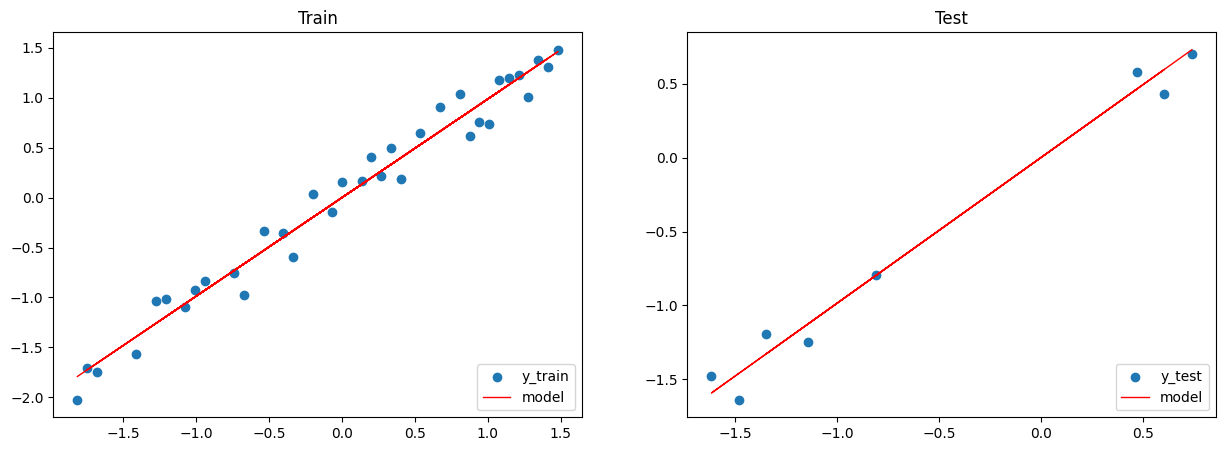

In [52]:
# Figure size
plt.figure(figsize=(15,5))

# Plot train data
plt.subplot(1, 2, 1)
plt.title("Train")
plt.scatter(X_train, y_train, label="y_train")
plt.plot(X_train, pred_train, color="red", linewidth=1, linestyle="-", label="model")
plt.legend(loc="lower right")

# Plot test data
plt.subplot(1, 2, 2)
plt.title("Test")
plt.scatter(X_test, y_test, label='y_test')
plt.plot(X_test, pred_test, color="red", linewidth=1, linestyle="-", label="model")
plt.legend(loc="lower right")

# Show plots
plt.show()

In [53]:
''' "De - Standardizing" the values so that we can interpret the equation '''
W_unscaled = W * (y_std/X_std)
b_unscaled = b * y_std + y_mean - np.sum(W_unscaled * X_mean)

print(f" Actual equation y = 3.5X + noise")
print(f" Modelled Equation = {W_unscaled[0][0]:.1f}X + {b_unscaled[0]:.1f}")



 Actual equation y = 3.5X + noise
 Modelled Equation = 3.4X + 7.8


@article{madewithml,
    author       = {Goku Mohandas},
    title        = { Linear regression - Made With ML },
    howpublished = {\url{https://madewithml.com/}},
    year         = {2023}
}